In [1]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as mpl
import seaborn as sns
%matplotlib inline


In [33]:
train = pn.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train['Cabin'].isnull().count

<bound method Series.count of 0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool>

<Axes: >

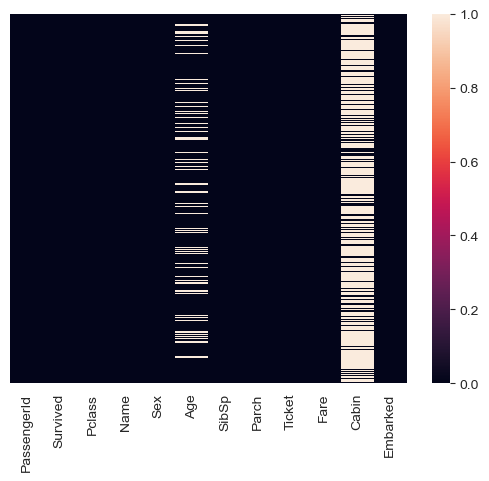

In [35]:
sns.heatmap(train.isnull(),yticklabels=False)

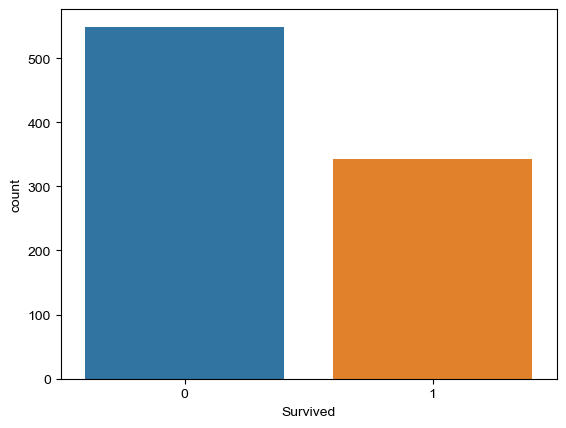

In [27]:
sns.countplot(x='Survived',data=train)
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

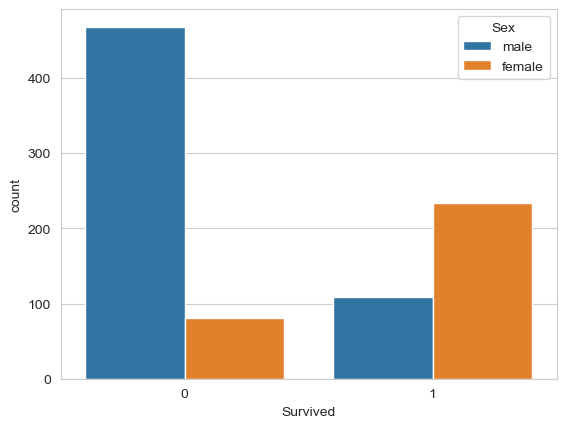

In [28]:
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

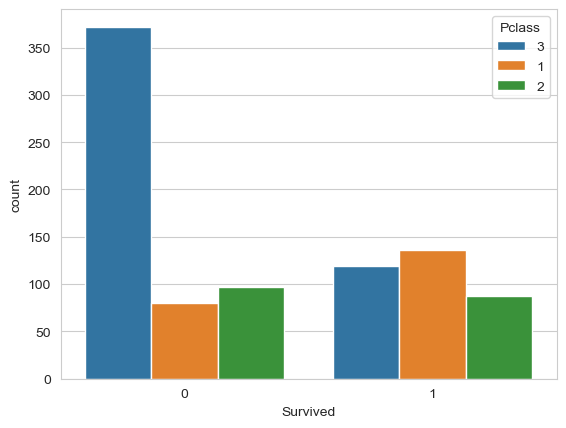

In [38]:
train['Pclass'] = train['Pclass'].astype(str)
train['Survived'] = train['Survived'].astype(str)

sns.countplot(x='Survived',hue='Pclass',data=train)

/var/folders/wl/wvk4_t_j0jl0t6h8m3z2gvrh0000gn/T/ipykernel_35958/922731524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False)


<Axes: xlabel='Age'>

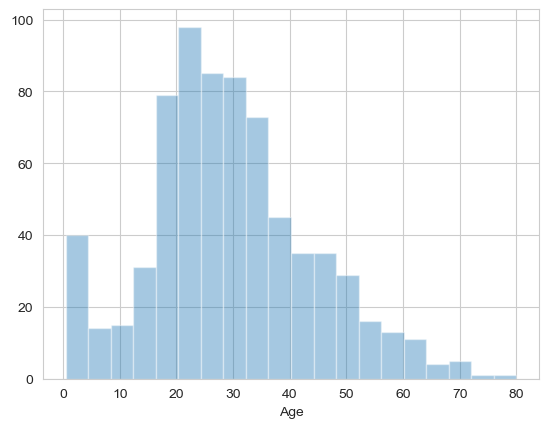

In [45]:
sns.distplot(train['Age'].dropna(),kde=False)

<Axes: xlabel='SibSp', ylabel='count'>

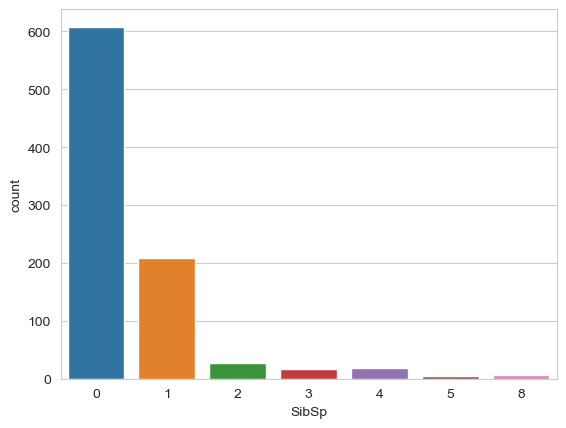

In [46]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

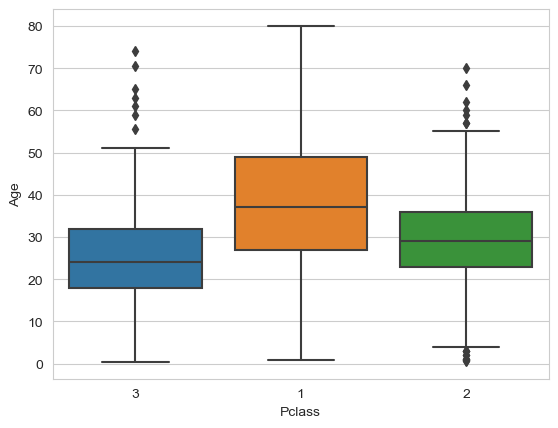

In [47]:
sns.boxplot(x='Pclass',y='Age',data = train)

In [74]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pn.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [83]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


/var/folders/wl/wvk4_t_j0jl0t6h8m3z2gvrh0000gn/T/ipykernel_35958/982868438.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/wl/wvk4_t_j0jl0t6h8m3z2gvrh0000gn/T/ipykernel_35958/982868438.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

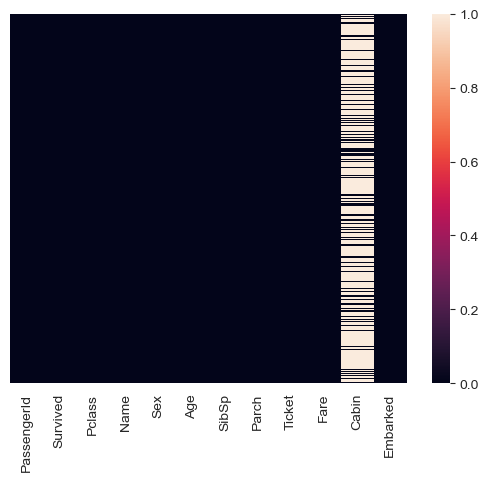

In [84]:
sns.heatmap(train.isnull(),yticklabels=False)

In [80]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
train.drop('Cabin',axis=1,inplace=True)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


<Axes: >

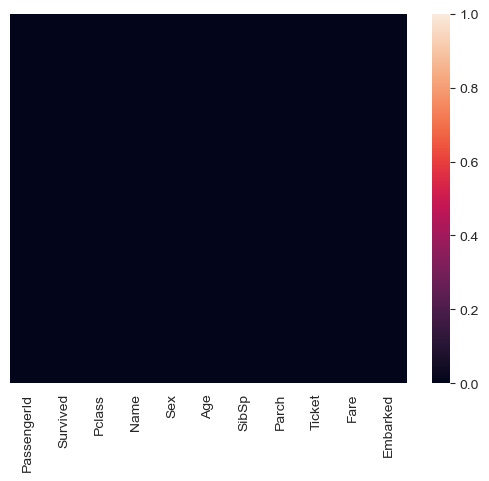

In [88]:
sns.heatmap(train.isnull(),yticklabels=False)

In [89]:
train.drop(['Ticket','PassengerId','Name'],axis=1,inplace=True)

In [90]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,24,1,0,7.2500,S
1,1,1,female,24,1,0,71.2833,C
2,1,3,female,24,0,0,7.9250,S
3,1,1,female,24,1,0,53.1000,S
4,0,3,male,24,0,0,8.0500,S


In [92]:
sex=pn.get_dummies(train['Sex'],drop_first=True)
embark=pn.get_dummies(train['Embarked'],drop_first=True)

In [93]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,24,1,0,7.2500,S
1,1,1,female,24,1,0,71.2833,C
2,1,3,female,24,0,0,7.9250,S
3,1,1,female,24,1,0,53.1000,S
4,0,3,male,24,0,0,8.0500,S


In [94]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [97]:
train = pn.concat([train,sex,embark],axis=1)

In [98]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,True,False,True
1,1,1,24,1,0,71.2833,False,False,False
2,1,3,24,0,0,7.9250,False,False,True
3,1,1,24,1,0,53.1000,False,False,True
4,0,3,24,0,0,8.0500,True,False,True


In [99]:
train.drop('Survived',axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,24,1,0,7.2500,True,False,True
1,1,24,1,0,71.2833,False,False,False
2,3,24,0,0,7.9250,False,False,True
3,1,24,1,0,53.1000,False,False,True
4,3,24,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,24,0,0,13.0000,True,False,True
887,1,24,0,0,30.0000,False,False,True
888,3,24,1,2,23.4500,False,False,True
889,1,24,0,0,30.0000,True,False,False
